# Module 4: Calculus & Differential Equations

---

## Motivation
Rarely are systems in the world static; everything we experience exist and change with respect to time. Some things change slowly, like a rock that appears the same after many years, and others change quickly, like the membrane potential of a neuron that fires an action potential. Whether slow or fast, understanding how these *dynamical systems* change over time is relevant to many areas of research. Geologists, knowing the abundance and half-life of specific radioisotopes in rocks, can estimate how old the rock. Similarly, Neuroscientists can model the membrane potential of a neuron by knowing the properties of specific ion channels and learn what perturbations to the system might cause it to fire an action potential. Both of these problems can be done using concepts of *differential equations*, a subject that relies heavily on principles learned in *calculus*.

If you've signed up for NEU 314 or have any interest in modeling dynamical systems in neuroscience, you'll be expected to know a thing or two about calculus and differential equations. While NEU 314 should have a review on calculus and teach you more about differential equations, the content provided over the next two days should introduce you to some of the basics of both and hopefully lay some groundwork that will help you in your later studies. If you're already familiar with calculus and differential equations, this module should serve as a brief review of some important things to remember. If you have no experience with either, I hope that the content is accessible enough to give you an intuitiuon for these concepts and make them more accessible the next time you encounter them.

The material written up here has drawn from textbooks I used as an undergraduate when taking these courses:
- Hughes-Hallett, Deborah, Andrew M. Gleason, and William G. McCallum. 2008. *Calculus: Single Variable*, 5th Edition. Wiley 
- Abell, Martha L. L., and James P. Braselton. 2009. *Introductory Differential Equations: With Boundary Value Problems*, 3rd Edition. Academic Press.

While I can't argue these are the *best* textbooks for either subject, they will certaintly provide a more thorought treatment of the subjects if you care to learn more. I also included the edition of the books I own; there are, of course, newer editions in print, but the older editions should be sufficient for a general overview.


---

# Day 1: Calculus
The review presented here is by no means meant to be comprehensive; truly, it is an oversimplified account of a subject that contains much more than can be covered in a day. Presented here is what I hope to be the bare minimum of what is required to build an intuition of a few tools that calculus provides that can be applied to situations you may encounter in this program.

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy.linalg as lin
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D

---
## 1. Derivatives
Imagine that you're piloting an experiment on rat sprinting, and you're looking for the fastest rat that Charles River Laboratories has to offer. You find that Charles River only provides samples of position data as a function of time for each strain available. How will you know the speeds that these rat can attain before ordering them? Fortunately, calculus provides a common tool to help with a question like this: derivatives. Derivatives describe the rate at which some function changes. If you were to take the derivative of the *position* data from Charles River, you could estimate the *velocity* at which these rats were running.

### Numerical approximation
In many formal calculus courses, a primary focus is finding derivatives of mathematical expressions like $f(t) = t^2$. While the use of these types of expressions (albeit much more complicated) is common in the realm of computational neuroscience and behavioral modeling, on the experimental side of neuroscience you'll more commonly be given long vectors or matrices of raw data that can't be described by a clean, closed-form expression. In these cases, you may still want to know how whatever variable is being measured is changing over time. For this reason, defining the numerical approximation to derivatives will provide us with (at least) two benefits: 1) it will provide us a tool that can be used on any data set, discrete or continous; and 2) it will help us build towards the formal definition of derivatives, leading into a review of analytical solutions that can be useful in situations where mathematical expressions are available.

Lets start with a simple function $f(t) = t^2$, plotted below, to introduce some equations. For the sake of analogy, $t$ will be a measure of *time* and $f(t)$ will be a measure of *position*. 

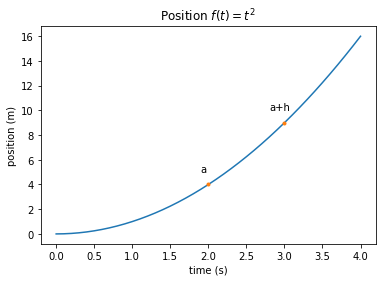

In [2]:
# plot equation f = t^2
t = np.arange(0,4.1,0.1) # populate t
f = t**2                 # populate f(t)

# plot and add some visualizations
_, ax1 = plt.subplots()
ax1.plot(t,f)
ax1.plot([2,3],[4,9],'.')
ax1.text(1.9,5,"a")
ax1.text(2.8,10,"a+h");
ax1.set_title(r"Position $f(t) = t^2$")
ax1.set_xlabel('time (s)')
ax1.set_ylabel('position (m)');

Let's say we want to approximate the dervative at point $a = 2$ demarkated on the plot above. How would we go about doing this? We can approximate the derivative by computing the average velocity over some interval spanning $a$ to a later timepoint $a+h$, where in our example above $h = 1$. This can be done using the following equation:

$$\begin{matrix}\text{Average rate of change of } f \\ \text{ over the interval from } a \text{ to } a+h\end{matrix}  = \frac{f(a+h) - f(a)}{h}$$

>**Note:** Using the interval from $a$ to $a+h$ to approximate the derivative at point $a$ is somewhat arbitrary and may not be the *best* interval to use. However, this interval was chosen to build to the eventual definition of the derivative presented a bit later.

A visualtization of what the quantities in this equation represent are plotted below (left), where $h$ is the change in time and $f(a+h)-f(a)$ is the change in position. Another way to think about the approximate derivative is as the *slope* of the line connecting $f(a)$ and $f(a+h)$ (plotted in green). 

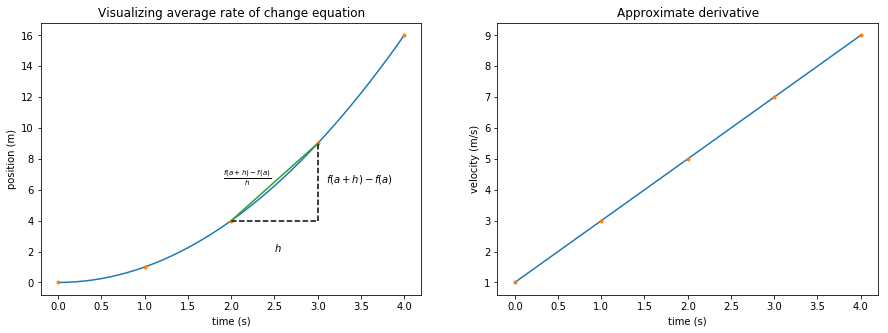

In [3]:
# populate points to use for approximation
h = 1
t_dots = np.arange(0,6,h)  # i'm going past 4 for plotting as well as for the approximate derivative calculation
f_dots = t_dots**2

# plot and visualizations, indexing so only values between 0 and 4 are shown
_, (ax2,ax3) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax2.plot(t,f)
ax2.plot(t_dots[0:-1],f_dots[0:-1],'.')
ax2.plot([2,3],[f_dots[2],f_dots[2]],'k--')
ax2.plot([3,3],[f_dots[2],f_dots[3]],'k--')
ax2.plot([2,3],[f_dots[2],f_dots[3]])
ax2.text(2.5,f_dots[2]-f_dots[2]/2,r"$h$")
ax2.text(3.1,np.mean(f_dots[2:4]),r"$f(a+h) - f(a)$")
ax2.text(1.9,np.mean(f_dots[2:4]),r"$\frac{f(a+h)-f(a)}{h}$")
ax2.set_xlabel('time (s)')
ax2.set_ylabel('position (m)');
ax2.set_title("Visualizing average rate of change equation")

f_diff = np.diff(f_dots)/h  # this is what's computing the approximate derivative
# plot 2
ax3.plot(t_dots[0:-1],f_diff)
ax3.plot(t_dots[0:-1],f_diff,'.')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('velocity (m/s)');
ax3.set_title("Approximate derivative");

Usually, we want to approximate the derivative at more than just a single point to estimate the overall derivative function, which is helpful to see how the velocity is changing over time. The equation above can be applied more generally to any point $t$:

$$\begin{matrix}\text{Average rate of change of } f \\ \text{ over the interval from } t \text{ to } t+h\end{matrix}  = \frac{f(t+h) - f(t)}{h}$$

If we use the above function to approximate the derivative at $t = [0, 1, 2, 3, 4]$ with the same $h = 1$, we can plot the approximate derivative function, or velocity function, shown above (right). 

For those with a background in calculus, the shape of this derivative should come as no surprise. The analytical derivative of $f(t) = t^2$ is $f'(t) = 2t$ (if you don't have a background in calculus and wonder why this is, don't worry, we'll come back to it later). Since the derivative is a *linear* function and the numerical approximation is a *linear* approximation, it should be no surprise that this solution is a perfect approximation of the derivative. If we instead use a function whose derivative is *not* linear, e.g. $f(t) = t^3$, then our numerical approximation will not look as nice.

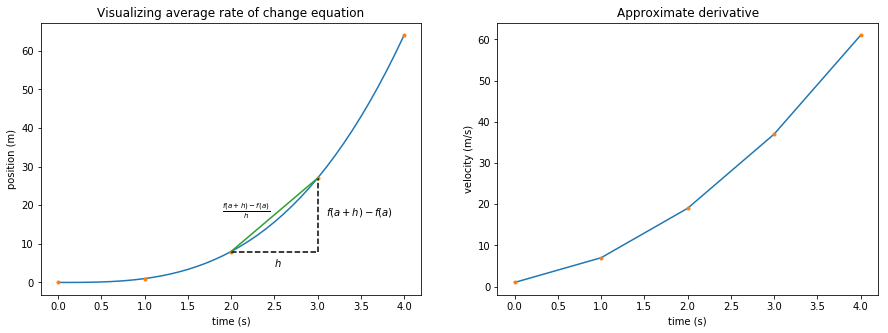

In [4]:
# plot equation y = x^3
t = np.arange(0,4.1,0.1)
f = t**3

h = 1
t_dots = np.arange(0,6,h)
f_dots = t_dots**3

_, (ax4,ax5) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax4.plot(t,f)
ax4.plot(t_dots[0:-1],f_dots[0:-1],'.')
ax4.plot([2,3],[f_dots[2],f_dots[2]],'k--')
ax4.plot([3,3],[f_dots[2],f_dots[3]],'k--')
ax4.plot([2,3],[f_dots[2],f_dots[3]])
ax4.text(2.5,f_dots[2]-f_dots[2]/2,r"$h$")
ax4.text(3.1,np.mean(f_dots[2:4]),r"$f(a+h) - f(a)$")
ax4.text(1.9,np.mean(f_dots[2:4]),r"$\frac{f(a+h)-f(a)}{h}$")
ax4.set_xlabel('time (s)')
ax4.set_ylabel('position (m)');
ax4.set_title("Visualizing average rate of change equation")

f_diff = np.diff(f_dots)/h
ax5.plot(t_dots[0:-1],f_diff)
ax5.plot(t_dots[0:-1],f_diff,'.')
ax5.set_xlabel('time (s)')
ax5.set_ylabel('velocity (m/s)');
ax5.set_title("Approximate derivative");

t_dots = np.arange(0,6,1)
f_dots = t_dots**3

One of the contributing factors to the solution not looking as clean is our choice of $h$. With a smaller $h$, we can smooth out our solution even further to get a better approximation of the derivative.

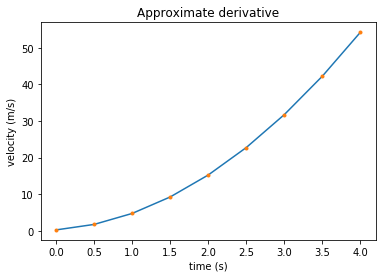

In [5]:
h = 0.5  # now h is half as long
t_dots = np.arange(0,6,h)
f_dots = t_dots**3

_, ax6 = plt.subplots()
f_diff = np.diff(f_dots)/h
ax6.plot(t_dots[0:-3],f_diff[0:-2])
ax6.plot(t_dots[0:-3],f_diff[0:-2],'.')
ax6.set_xlabel('time (s)')
ax6.set_ylabel('velocity (m/s)');
ax6.set_title("Approximate derivative");

Continuing to shrink down the size of $h$ until it is arbitrarily small is how we reach our formal definition of the derivative:

 $$\boxed{f'(t) = \lim_{h \to 0} \frac{f(t+h) - f(t)}{h}}$$
 
The above equation uses what is referred to as a *limit*. Put simply, the right-hand side of the equation only equals the true derivative $f'(x)$ as the value of $h$ approaches 0, otherwise stated as the *limit* of $h \to 0$. This notation is used because if $h=0$, the function would be considered undefined.

Before we move on to our review of analytical solutions to derivatives, let's apply our numerical solution to some real data and get a feel for what that looks like.

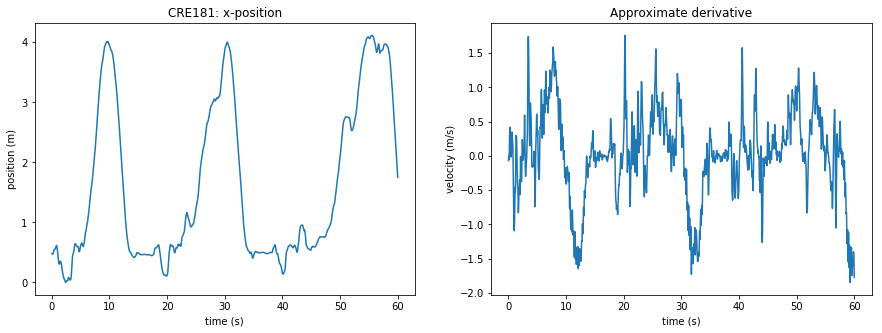

In [6]:
# load data
tmp = loadmat('CRE181_positionData.mat');
data = tmp['data']

# grab the first minute
ts = data[:3000,0]
x = data[:3000,1]/100 # convert to meters

_, (ax7,ax8) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax7.plot(ts,x)
ax7.set_xlabel('time (s)')
ax7.set_ylabel('position (m)');
ax7.set_title("CRE181: x-position");

dt = np.diff(ts)               # with the timestamps, we can get the change in t or "h" on a step-by-step basis
dx = np.divide(np.diff(x),dt)  # this is our average rate of change equation for each time stamp; element-wise division 
ax8.plot(ts[:-1],dx)           # we have one less data point for our "derivative" than for our raw position data
ax8.set_xlabel('time (s)')
ax8.set_ylabel('velocity (m/s)');
ax8.set_title("Approximate derivative");

Plotted above on the left is a minute of position data from CRE181, a solid rat who loved Froot Loops. Can you guess what he's doing by the plot on the left? Hopefully you've noticed the cyclical nature of the position -- this is because CRE181 is running in circles, but I'm only plotting the x-dimension, where the lap "resets" at around 4 meters. Plotted on the right is the approximate derivative, or the velocity, computed using the equation above. Based on the velocity above, can you guess around what position CRE181 is munching on some Froot Loops?

There's something misleading about the velocity plotted on the left arising from the circular position plotted on the right -- there are quick, negative spikes in velocity. I've seen CRE181 running on the circle track, and I can be pretty confident that he never reversed at lightning speeds to make a quick backwards lap before continuing forward. In fact, he rarely turned the other way, like a true Zoolander of the animal kingdom. To get a more accurate depiction of how his velocity evolves over time, it's better to take a *cumulative sum* of his position so that the lap resets don't confuse our results.

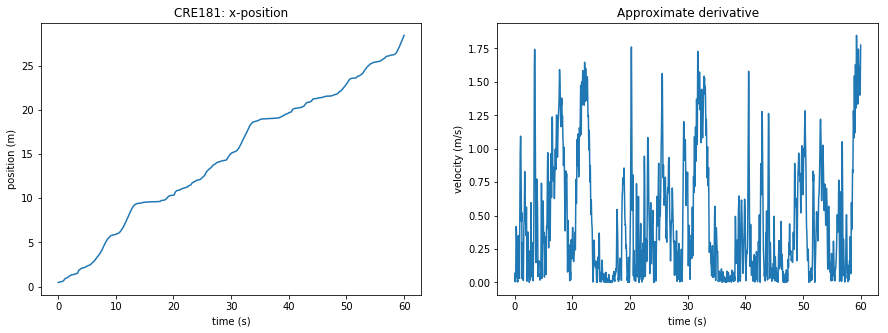

In [7]:
# a useful function -- performes the circular difference to accound to the lap resets
def circDiff(data):
    cycle = np.max(x)            # this is the maximum position at which it resets
    diffData = np.diff(data)
    diffData2 = np.vstack((diffData,diffData+cycle,diffData-cycle))
    return np.min(abs(diffData2),axis=0)

# do the cumulative sum
x_cum = np.cumsum(np.hstack((x[0],circDiff(x)))) 
dx_cum = np.diff(x_cum)/dt

_, (ax7,ax8) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax7.plot(ts,x_cum)
ax7.set_xlabel('time (s)')
ax7.set_ylabel('position (m)');
ax7.set_title("CRE181: x-position");

ax8.plot(ts[:-1],dx_cum)           
ax8.set_xlabel('time (s)')
ax8.set_ylabel('velocity (m/s)');
ax8.set_title("Approximate derivative");

There's one thing about the position data used above that shouldn't be taken for granted: the frame rate of the camera used to record the data, 50 Hz, is a reasonable resolution to compute the numerical derivative, so we didn't need to do any manipulation of the data to compute it. What if we have data that's recorded at an extremely high resolution such that it's unreasonable to compute the rate of change at every given timestamp, e.g. spiking data recorded at 30,000 Hz? We'll revisit this question later in the exercises.

### Analytical solutions
As alluded to above, many functions have an analytical solution for their derivative; in other words, many functions have a definite, closed-form solution that can be used in place of numerical approximations. Unfortunately, going through and deriving analytical solutions to many common functions is beyond the scope of this workshop. Luckily, however, it is very easy to find resources online that list out the most common solutions.
**Table of derivatives:** http://www.math.com/tables/derivatives/tableof.htm 

> **Aside on notation:** Up until this point, I have been defining derivatives of $f(t)$ as $f'(t)$ (pronounced "f prime of t"). There are couple other notations you may encounter besides using "prime". One of the most common, as used in the table above, is fractional notation: instead of using the function handle $f(t)$, you would define functions in terms of it's independent and dependent variables, e.g. $y = t^2$, where the derivative would be written as $\frac{dy}{dt} = 2t$. The term $dy$ is referred to as the "differential of $y$" (which you can think of as an infitesimally small difference in $y$) and $dt$ is the "differential of $t$". The fraction $\frac{d}{dt}$ (or $\frac{d}{dx}$ depending on the indepenent variable) is used to indicate "differentiate with respect to $t$". Another common notation is the "dot" notation, where $\frac{dy}{dt}$ is referred to as $\dot{y}$.

<ins> **Helpful rules of differentiation** </ins>

If you've looked through the table linked above, it should be obvious that it isn't a comprehensive list of possible functions you might encounter. However, many functions you will encounter will be either linear or non-linear combinations of these functions. Linear combinations (e.g. ones that are added together or multiplied by constants) are fairly simple to handle and easily transfer to their derivatives, which can be summarized by the following principle: for differentiable functions $f(x)$ and $g(x)$ and constants $c$ and $d$,
$$\frac{d}{dx}(c\cdot f(x) \pm d\cdot g(x)) = c\cdot f'(x) \pm d\cdot g'(x)$$

For non-linear combinations of functions (e.g. ones that are multiplied or divided), there are a few helpful rules to help break apart the differentiation process, summarized below.

>**The Product Rule:** If $u=f(x)$ and $v=g(x)$ are differentiable, then
$$ (fg)' = f'g + fg' $$
which can also be written as
$$ \frac{d(uv)}{dx} = \frac{du}{dx} \cdot v + u \cdot \frac{dv}{dx} $$


>**The Quotient Rule:** If $u=f(x)$ and $v=g(x)$ are differentiable, then
$$ \left(\frac{f}{g}\right)' = \frac{f'g -fg'}{g^2}$$
which can also be written as
$$\frac{d}{dx}\left(\frac{u}{v}\right) = \frac{\frac{du}{dx}\cdot v - u \cdot \frac{dv}{dx}}{v^2}$$

>**The Chain Rule:** If $f$ and $g$ are differentiable functions, then
$$\frac{d}{dx}f(g(x)) = f'(g(x)) \cdot g'(x)$$

### Second-order derivatives and beyond

All the derivatives we've dealt with so far are considered to be *first-order* derivatives. This means that the base function has only been differentiated once. However, there are many circumstances where you'll want to take a derivative a second or more times, essentially giving you the rate of change of the rate of change and so on. The most familiar example of this is *acceleration*. It we have a function $f(t)$ describing position, we know the first derivative $f'(t)$ describes velocity. The second derivative, $f''(t)$, describes *acceleration*, and is simply computed by taking the derivative of $f'(t)$. Equivalent notation that indicates second-order derivatives is $f''(t) = \frac{d^2y}{dt^2} = \ddot{y}$. Increasing the exponent, number of "primes", or number of dots indicate higher order derivatives

### A brief extension to multivariable calculus: partial derivatives

All of the examples demonstrated above all fall under the umbrella of *single-variable* calculus where functions are only expresesed in terms of one independent variable (e.g. $f(x)$ only depends on $x$). However, there are many cases where you'll encounter functions that depend on multiple independent variables (e.g. $f(x,t)$ depends on both $x$ and $t$), which moves us into the domain of multivariable calculus. Multivariable calculus is a subject that usually requires a semester of it's own to adequately cover, which is obviously time we don't have in this short workshop. However, I wanted to highlight one principle of multivariablle calculus if you ever find yourself in the position of needing to differentiate a function with multiple independent variables: partial derivatives.

Partial derivatives are a simple extension from "normal" derivatives, except that they use sligtly different notaion. Usually when you encounter a function that depends on multiple variables, e.g. $f(x,t)$, you'll only want to learn how that function changes with respect to *one* of the variables. In these circumstances we take a *partial derivative* with respect to that single variable, e.g. $x$, denoted $\frac{\partial}{\partial x}$. Computing this derivative is fairly simple: just treat the function as if $x$ is the only independent variable and $t$ is a constant. For example, if $f(x,t) = tx^2$, then $\frac{\partial}{\partial x}f(x,t) = 2tx$.

### Optimization

A common application of derivatives is in the context of *optimization*. Think back to our Charles River rat dilemma: if we want the to know which is fastest rat, we need not only their velocity as a function of time, but also the the time at which their velocity was at its *maximum*. Knowing the maximum velocity of all the rat strains will surely pinpoint which of them is the fastest. 

How can derivatives help solve this problem? Let's imagine we've got a Long Evans rat that runs a lot like the function $f(t) = (t-1)^3 -4(t-1)^2+10$, plotted below on the left.

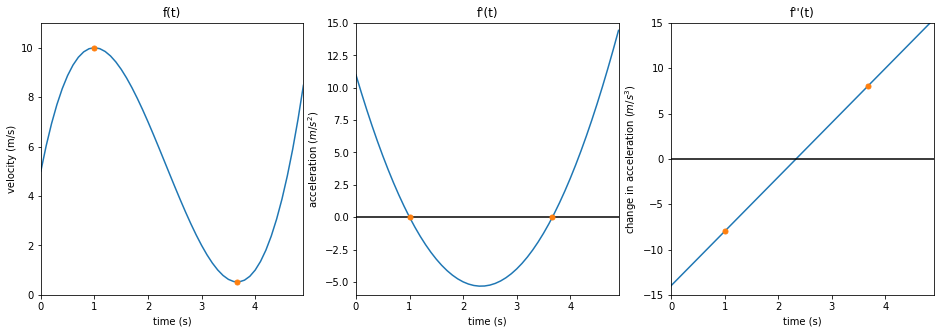

In [8]:
t = np.arange(0,5,0.1)
f = (t-1)**3-4*(t-1)**2+10
fdiff = 3*(t-1)**2 - 8*(t-1)
fdiff2 = 6*(t-1) - 8

pt1 = (14+np.sqrt(14**2-4*3*11))/(2*3)
pt2 = (14-np.sqrt(14**2-4*3*11))/(2*3)
f_pt1 = (pt1-1)**3-4*(pt1-1)**2+10
f_pt2 = (pt2-1)**3-4*(pt2-1)**2+10

_,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
ax1.plot(t,f)
ax1.plot([pt1,pt2],[f_pt1,f_pt2],'.',ms=10)


ax1.set_xlabel('time (s)')
ax1.set_ylabel('velocity (m/s)')
ax1.axis([0,4.9,0,11])
ax1.set_title('f(t)');

ax2.plot(t,fdiff)
ax2.axhline(y=0, color='k')
ax2.axis([0,4.9,-6,15])
ax2.plot([pt1,pt2],[0,0],'.',ms=10)
ax2.set_xlabel('time (s)')
ax2.set_ylabel(r'acceleration ($m/s^2$)')
ax2.set_title('f\'(t)');

ax3.plot(t,fdiff2)
ax3.axhline(y=0, color='k')
ax3.axis([0,4.9,-15,15])
ax3.plot([pt1,pt2],[6*(pt1-1)-8,6*(pt2-1)-8],'.',ms=10)
ax3.set_xlabel('time (s)')
ax3.set_ylabel(r'change in acceleration ($m/s^3$)')
ax3.set_title('f\'\'(t)');



It should be obvious by looking at the graph that the maximum velocity is around 10 m/s somewhere between 1 and 2 seconds. If we want a more precise value, we could use the ```numpy.maximum()``` function to easily compute what the maximum is since we have a vector of velocities. For a problem as simple as this, using ```numpy.maximum()``` is probably the way to go. Truly, using derivatives to find the maximum velocity of this rat is probably overkill; however, we can use the simplicity of this function to highlight important properties of derivatives that can be used for optimization in more complex scenarios. 

First, look at the maximum point on the graph above -- what do you notice about this point? If you thought "the slope at that point is 0 since it's at the top of a hill", then you are one step closer to using derivatives for optimization. Points on a function $f(t)$ where $f'(t) = 0$ (the slope is 0) are referred to as *critical points*. (Critical points also exist where $f'(t)$ is undefined.) This observation, however, also applies to *minimum* point on the graph, since the slope at the bottom of a valley is also 0. Therefore, identifying critical points where $f'(t) = 0$ is a way to mathematically identify *local maxima* as well as *local minima*. Next, look at the behavior of the derivative $f'(t)$ around these critical points, plotted in the middle. You should notice that it is *positive* as you move towards a local maximum and *negative* as you move away from it. Another term to describe this behavior is that the function is *concave down* around that point. The opposite is true around the local minima: the derivative is *negative* as you move towards it and *positive* as you move away, also known as *concave up*. Knowing whether the function is concave down or concave up at a critical point is a simple way to determine whether it is a local maxima or a local minima; in fact, the second derivative, $f''(t)$, is an easy way to determine this. Looking at $f''(t)$ plotted on the right, you can see that it takes a *negative* value when the function is *concave down* around the local maximum, and it takes a *positive* value when the function is *concave up* around the local minimum. When $f''(t)=0$, this is known as an *inflection point*, where the function switches between concave up to concave down or vice versa. 

To summarize, first and second derivatives can be used to determine local maxima and minima of $f(t)$, following:
- If $f'(p)=0$ and $f''(p)>0$ then $f$ has a local minimum at $p$
- If $f'(p)=0$ and $f''(p)<0$ then $f$ has a local maximum at $p$
- If $f'(p)=0$ and $f''(p)=0$ then the test tells us nothing

Of course, the above properties only help to find *local* minima and maxima. To find *global* minima and maxima, you would need to compare the values across all critical points (as well as at the bounds, if you're computing over a bounded interval). However, unless the interval over which you're trying to compute a global maxima or minima is bounded, it's not guaranteed that a global maxima or minima exists (e.g. when a function $f(t) \to \infty$ when $t \to \infty$).

<ins> **Connection to model-fitting: Gradients** </ins>

These principles of optimization are useful in the realm of *model fitting*, which you may have encountered in an earlier module. To assess how well a model fits some data, you may compute a *log-likelihood*. The log-likelihood is usually a function of some set of parameters and can be thought of as probability *landscape*, where high values form *hills* that correspond to *better* model fits, while low values form *valleys* that correspond to *worse* model fits, like in the figure below.

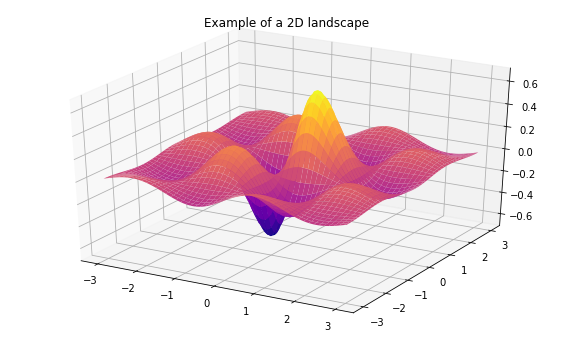

In [9]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
x, y = np.meshgrid(x,y)
z = np.sin(2*x)*np.cos(2*y)/(1+x**2+y**2)

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z,cmap='plasma')
ax.set_title('Example of a 2D landscape');

Otentimes, model fitting involves optimizing one or more of these parameters to improve the model fit; in other words, if each point on the landscape corresponds to a specific set parameter values, you want to find the set that corresponds to the highest point in the landscape. Unlike the example above, however, these problems aren't as simple as setting the derivative to be equal to 0, since there is often more than one parameter, or more than one dimenstion, over which you need to optimize. In this case, we use what is known as a *gradient*. The gradient makes use of *partial derivatives* such that we can know the rate of change according to each parameter.

To define the gradient, let's start with some function that depends on multiple independent variables. For the sake of simplicity, we'll let these independent variables be coordinates in 3D-space, giving us some function $f(x,y,z)$. We denote the **gradient** of that function by $\text{grad} f$ or $\nabla f$ (read "nabla" $f$), which is defined as:

$$
\boxed{\text{grad}f = \nabla f = \left[\frac{\partial f}{\partial x},\frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}\right] = \frac{\partial f}{\partial x}\mathbf{i} + \frac{\partial f}{\partial y}\mathbf{j} + \frac{\partial f}{\partial z}\mathbf{k}}
$$

As shown above, the gradient is a vector of partial derivatives, where each element describes the rate of change in the direction of the independent variable that was used to compute it. In other words, in the expression above, the first element of the vector, $\frac{\partial f}{\partial x}$, is the rate of change in the *x-direction*; the second element, $\frac{\partial f}{\partial y}$, is the rate of change in the *y-direction*; and the third element, $\frac{\partial f}{\partial z}$, is the rate of change in the *z-direction*. The last part of the expression, if it's something you haven't seen before, is just another way to write a position vector, where $\mathbf{i}$, $\mathbf{j}$, and $\mathbf{k}$ correspond to the x-,  y-, and z-directions, respectively, or more generally used to indicate orthogonal directions.

If given some initial point, the derivative of a single-variable function at that point tells us which way to move to reach the nearest hill or valley, i.e. move *with* (or add) the slope to reach the maximum or move *against* (or subtract) the slope to reach the minimum. In the same way, gradients can tell us which way to go to reach the hills and valleys of multi-variable functions. This is known as **gradient ascent** when finding the hills and **gradient descent** when finding the valleys. While we won't go into the details of how to implement these methods (that is better left to a modeling course), hopefully your knowledge of derivatives can provide intuition on how these methods work: given some initial point, compute the gradient at that point and move *with* the gradient to find a maximum or move *against* the gradient to find a minimum. An important thing to remember: just like the derivative is only useful for finding *local* minima and maxima, gradient ascent and gradient descent suffer from the same issue. It will find *some* hill or valley, but you can't be sure it's the *best* hill or valley without exhaustively searching the landscape.

---
## 2. Integrals

Let's imagine another scenario: in part two of your experiment, you want to examine rat long-distance running. This time you're ordering from Hilltop Laboratories, but strangely enough Hilltop only provides sample data of rat velocity. For this expiriment, however, you need to know how far these rats ran -- you need ones that are in it for the long haul. Fortunately, calculus provides some tools to let us solve this problem as well in the form of integration. 

Integration is often thought of as the reverse of differention. Instead of going from *position* to it's rate of change, *velocity*, we're taking the *velocity* to compute some change in *position*. Let's start with simple example: one of the Hilltop rats is a true natural wonder and is physically incapable of moving at any speed other than $2.5$ m/s. If we know that this rat moved at $2.5$ m/s for $10$ s, then a simple multiplication and unit cancellation tells us that the rat ran $2.5$ m/s $\times$ $10$ s = $25$ m. Importantly, this can be visualized as the "area under the curve" of the function $f(t) = 2.5$ over the bounded interval from $0$ to $10$.

>**Note:** Semantically, (definite) integration is not *actually* the inverse of differentiaion; *antidifferentiation* is the true "inverse" process of differention, but integration and antidifferentiation are intimately related through the fundamental theorem of calculus, which we'll cover later on in this section.   


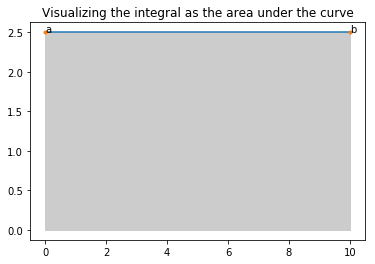

In [10]:
t = [0,10]
f = [2.5,2.5]

_, ax9 = plt.subplots()
ax9.plot(t,f)
ax9.fill_between(t,f,color=[0.8,0.8,0.8])
ax9.plot(t,f,'.')
ax9.text(0,2.5,'a')
ax9.text(10,2.5,'b')
ax9.set_title(r"Visualizing the integral as the area under the curve");

Outside of this anomaly rat from Hilltop, you'll find that most rats (and many things in general) do not travel at constant speeds, or have a constant rate of change in other domains. The idea, however, is largely the same: the integral can be computed by calculating the "area under the curve".

### Numerical approximation

As previously stated, most rates of change you encounter won't be constant, so there won't be a single rectangle that you can use to compute the integral. However, this simple case inspires a method to numerically approximate integrals in other scenarios by subdividing the area under the curve into smaller rectanges for which the area can be simply computed and added together. Let's go back to our example function $f(t)=t^2$, except this time treat is as the *velocity*. We want to find the distance traveled by this agent over the interval between $0$ and $4$ s. The integral that computes this quantity is notated $\int_a^b f(t)dt$, where $dt$ is the differential of $t$ (the variable you're integrating with respect to) and $a$ and $b$ denote the bounds of the interval over which the integral is computed.

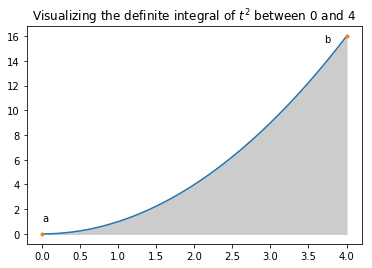

In [11]:
t = np.arange(0,4.1,0.1) # populate t
f = t**2   

_, ax10 = plt.subplots()
ax10.plot(t,f)
ax10.fill_between(t,f,color=[0.8,0.8,0.8])
ax10.plot([0,4],[0,16],'.')
ax10.text(0,1,'a')
ax10.text(3.7,15.5,'b')
ax10.set_title(r"Visualizing the definite integral of $t^2$ between 0 and 4");

>**Note:** The term *definite integral* refers to an integral calcluated from a continuous function over an interval of finite length. There are other classes of integrals that do not satisfy these conditions, most notably *indefinite integrals* which are integrals that are unbounded, which we'll get into later.

We can approximate this integral by subdividing the area into smaller rectangles of equal width $\Delta t = t_f - t_i$ and variable height $f(t_i)$. The area of these rectangles are added together to approximate the integral as follows:

$$\int_{a}^{b}f(t)dt \approx \sum_{i=0}^{n-1}f(t_i)\Delta t $$

where $t_0 = a$, $t_1 = a+\Delta t$, ..., $t_{n-1} = b-\Delta t$, $t_n = b$, and $\Delta t$ can be computed as

$$ \Delta t = \frac{b-a}{n} $$

where $n$ is the number of rectangles or subdivisions of the integral. This is known as the *left hand sum* since were using the value of $f(t)$ on the left side of the rectangle to dictate the height. This could just as easily be computed as a *right hand sum*, where the value of $f(t)$ on the right side of the rectangle is used as the height instead. This modifies the sum to be:
$$\int_{a}^{b}f(t)dt \approx \sum_{i=1}^{n}f(t_i)\Delta t $$

Examples of rectangles making up both the left (dark gray) and right (light gray addition) hand sums is plotted below.

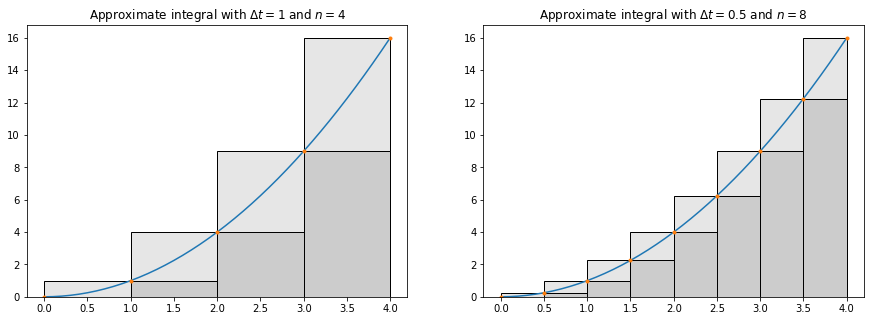

In [12]:
t = np.arange(0,4.1,0.1)
f = t**2

h = 1
t_dots = np.arange(0,6,h)
f_dots = t_dots**2

_, (ax11,ax12) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax11.plot(t,f)
ax11.plot(t_dots[0:-1],f_dots[0:-1],'.')
ax11.bar(t_dots[0:-2]+0.5,f_dots[1:-1],color=[0.9,0.9,0.9],edgecolor="black",width=1)
ax11.bar(t_dots[0:-2]+0.5,f_dots[0:-2],color=[0.8,0.8,0.8],edgecolor="black",width=1)
ax11.set_title(r"Approximate integral with $\Delta t = 1$ and $n = 4$")

t_dots2 = np.arange(0,5,0.5)
f_dots2 = t_dots2**2

ax12.plot(t,f)
ax12.plot(t_dots2[0:-1],f_dots2[0:-1],'.')
ax12.bar(t_dots2[0:-2]+0.25,f_dots2[1:-1],color=[0.9,0.9,0.9],edgecolor="black",width=0.5)
ax12.bar(t_dots2[0:-2]+0.25,f_dots2[0:-2],color=[0.8,0.8,0.8],edgecolor="black",width=0.5)
ax12.set_title(r"Approximate integral with $\Delta t = 0.5$ and $n = 8$");

Both the left and right hand sums are appropriate methods to approximate integrals; in fact, averaging the two often leads to a better approximation. 
>**Note:** Both the left and right hand sums are referred to as *Riemann sums*. Oftentimes to improve estimation accuracy even further, the width of the rectangle $\Delta t$ is also made to be variable across rectangles (e.g. a wider rectangle is used for function intervals with a smaller slope and narrower rectangles are used for function intervals with a higher slope). Additionally, the height of the rectangle $f(t)$ can be chosen from anywhere in the function interval to maximize accuracy. 

As can be seen by the right plot above, the accuracy of the approximation improves as we increase $n$. Much like derivatives, we can reach the definition of the integral by taking the limit of $n \to \infty$. This can be reached through either the left or right hand sum

$$ \boxed{\int_{a}^{b}f(t)dt = \lim_{n \to \infty}\sum_{i=0}^{n-1}f(t_i)\Delta t} $$

or, equivalently

$$ \boxed{\int_{a}^{b}f(t)dt = \lim_{n \to \infty}\sum_{i=1}^{n}f(t_i)\Delta t} $$

>**What if the "area under the curve goes below the x-axis, i.e. f(t) is negative?** For portions where f(t) is negative, its integral is also negative; if you have both positive and negative portions of f(t), the area of the negative portions are subtracted from the area of the positive portions.

So what might this look like in practice? Let's return to my good friend CRE181, but this time with data giving his *speed*. We want to know how many meters he traveled in his first minute on the circle track, and for that we use the *speed* since we don't care about which direction he ran in. 

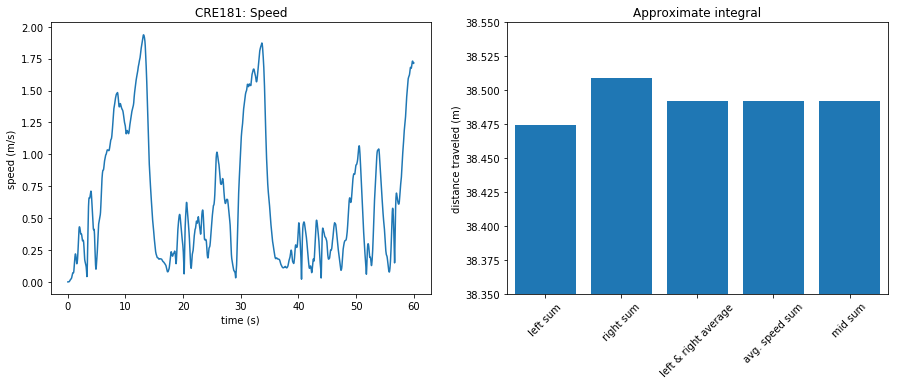

In [13]:
# load data
tmp = loadmat('CRE181_positionData.mat');
data = tmp['data']

# grab the first minute
ts = data[:3000,0]
v = data[:3000,3]/100 # convert to meters

_, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1.plot(ts,v)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('speed (m/s)');
ax1.set_title("CRE181: Speed");

dt = np.diff(ts)                          # calculating delta t
f_left = v[0:-1]                          # speed values to compute the left sum
f_right = v[1:]                           # speed values to compute the right sum
f_avg = np.mean((f_left,f_right),axis=0)  # average speed for the average sum

x_left = np.sum(f_left*dt)                # calculate the left sum
x_right = np.sum(f_right*dt)              # calculate the right sum
x_avg = np.sum(f_avg*dt)                  # calculate the "mid" sum, which is equal to the average of the left and right sums

# to compute the middle sum, we need to redefine the time intervals we use
# to place the speeds in the middle, we need to shift the timestamps by 1/2 the width of the original intervals, or 1/2 the inverse frame rate
# you can calculate the 1/2 inverse frame rate by taking the average dt defined above and dividing it by 2
# or if you know the frame rate, you can calculate it directly
fr = 50                                   # frame rate of data set -- this is usually given based on your recording equipment
dt_shift = (1/50)/2                       # half the inverse frame rate
dt_shift2 = np.mean(dt)/2                 # different way to compute
# we will define our "new" timestamps by subtracting dt_shift from every time stamp EXCLUDING the first time stamp
# this is because we cannot "create" data where it doesn't exist, so we don't want to move our initial time stamp out of bounds
# furthermore, we will add an additional timestamp at the end so that we can keep the true ending timestamp
ts_new = np.hstack((ts[0],ts[1:]-dt_shift,ts[-1]))       # new timestamps, separating the beginning and adding the ending timestamps
# now we'll calculate our "new" delta-t for our sum
dt_new = np.diff(ts_new)
# one thing to note about our new "dt" is that we have one for every speed in the interval,
# we don't need to exclude the last or first speeds like we do for the left and right sums, respectively
# additionally, the first and last dt are half the width of the rest of them -- this is so that our rectangles don't go outside our defined bounds
x_mid = np.sum(v*dt_new)

# plot all of our sums to compare
ax2.bar([1,2,3,4,5],[x_left,x_right,np.mean((x_left,x_right)),x_avg,x_mid])           
ax2.set_ylabel('distance traveled (m)');
ax2.set_title("Approximate integral");
ax2.axis([0.5,5.5,38.35,38.55])
ax2.set_xticks([1,2,3,4,5])
ax2.set_xticklabels(('left sum','right sum','left & right average','avg. speed sum','mid sum'),rotation=45);

Plotted above to the left is CRE181's net speed (note that this speed is accounting for both x- and y-directions, which we'll compute ourselves in a later exercise). There are five sums, or integrals, we can compute which are the easiest to numerically determine how far CRE181 traveled in the above snippet: 1) the left sum, 2) the right sum, 3) the average of the left and right sums, 4) the average speed sum, and 5) the middle sum. The left and right sums were defined above, where, for the interval $t=n-1$ to $t=n$, the left sum uses the speed on the left side of the interval to compute each step $f(t_{n-1})\Delta t$, and the right sum uses the speed on the right side of the interval to compute each step $f(t_{n})\Delta t$. The third sum is simply the average of the left and right sums. The fourth sum can be computed by using the average speed over the interval to compute each step, in this case $\frac{f(t_{n-1})+f(t_n)}{2}\Delta t$, or more generally $\frac{\sum_{k=1}^K f(t_k)}{K}\Delta t$. **Note:** In our case, since the over speeds to average over are at the bounds of the interval, the third and fourth sums will be equivalent. The fifth sum can be computed by using the speed at the midpoint of the interval to compute each step. Because of how our data set is structured, we don't actually have the speed at the midpoints of the time intervals given. To properly do this sum, then, we need to redefine the bounds of the intervals such that the points at which we do have speeds are at the middle. This is explained in more detail in the code above.

Given all the types of sums we computed above, it should be clear that the last three provide the most accurate estimate of the distance traveled; in general, however, they all are very close in value, which will be the case for a small $\Delta t$. It's up to you as the experimenter to decide which method is appropriate for the calculation you want to make.

### Analytical solutions: Antiderivatives
As stated previously, integration isn't the true inverse of differentiation. However, the inverse of differentiation, *antidifferentiation*, can be used to analytically solve definite integrals, demonstrated by the first fundamental theorem of calculus.

<div class="alert alert-block alert-info">
<b>First fundamental theorem of calculus:</b> If $f$ is a continuous function on the interval $[a,b]$ and $f(t) = F'(t)$, then 

$$ \int_{a}^{b} f(t)dt = F(b) - F(a) $$
</div>

This can be intuitively verified by realizing that for velocity $f(t)$, $\int_{a}^{b} f(t)dt$ represents the change in position from $t=a$ to $t=b$. If we knew the actual position $F(t)$ such that $F'(t) = f(t)$, then we can literally compute the change in position by taking the difference $F(b) - F(a)$.

So how are antiderivatives computed? For many elementary functions that have basic rules for differentiation, the *inverse* of that operation will give the antiderivative. Deriving these inverse rules, like for differentiation, is beyond the scope of this workshop; however, tables of integrals can be just as easily found as a reference for many basic functions. **Table of integrals:** http://www.math.com/tables/integrals/tableof.htm. Let's look at the first integral from this table: 

$$\int x^n dx = \frac{x^{n-1}}{n-1}+C$$

This type of integral is referred to as an *indefinite integral* as there are no bounds of integration, and it's solution is a *family of antiderivatives* where the constant $C$ can take any value. The solution to an indefinite integral is always written as a general antiderivative because any derivative can have an infinite number of antiderivatives differing by only a constant (since the derivative of a constant is 0).

>**If there is an infinite number of antiderivatives, how do you choose the right one to compute a definite integral?** Short answer: it doesn't matter. Since the computation to compute the definite integral is the difference between two points $F(b) - F(a)$, the constant will always cancel out.

>**Revisiting the difference between integration and antidifferentiation.** Now it's time to (hopefully) clear up any potential confusion surrounding the definitions of integral and antiderivatives. First, the term "integral" can be used interchangeably with either "definite integral" or "intefinite integral" depending on the context. In the note above, I stated that integration is not the same as antidifferentiation: this is true when you consider integration as the limit of the Riemann sum and antidifferentiation as the process of finding a function for which the derivative is given. This definition of integration is used in the context of *definite* integrals, which is usually the first type encountered in any calculus course. In the context of *indefinite* integrals, however, integration is often referred to as the process by which you find the family of antiderivatives of which are solutions. In this context, integration (or *indefinite* integration) and antidifferentiation can be used interchangeably.

<ins> **Helpful rules of antidifferentiation** </ins>

Similar to the table of derivatives, the table of integrals does not give a comprehensive list of functions you can encounter. Fortunately, there are two methods of antidifferentiation, *substitution* and *integration by parts*, that reverse the chain and product rules, respectivly, to help with more complicated elementary functions.

>**Note:** An important difference exists between differentiation and antidifferentiation. Every elementary function has an elementary derivative, which can be found using the product, quotient, or chain rules. However, many elementary functions *do not* have elementary derivatives, so these rules cannot be applied in many cases.

***Both methods that follow may be difficult to use without having the tables of derivatives and integrals memorized; for anyone that falls in that boat, just use this as and FYI of something that exists.***

The first method, *substitution*, is a formalization of a guess-and-check method to finding antiderivatives. It requires the *integrand* (or the function being integrated) to look like something that was differentiated using the chain rule. Let's demonstrate substitution with the indefinite integral $\int 3x^2 \cos(x^3)dx$. For anyone that has the table of derivatives memorized, you may be able to notice that $3x^2$ is the derivative of $x^3$, and both of these elements appear in the integrand. With this relationship in mind, we can define a new function $w = x^3$, denoted the *inside function*. We can differentiate $w$ to define a second relationship, $\frac{dw}{dx} = 3x^2$. These new functions can be substituted into our original integrand:

$$
\int 3x^2 \cos(x^3)dx \\
\int \frac{dw}{dx}\cos(w)dx \\
\int \cos(w)dw
$$

This final version in terms of $w$ is a much easier function to integrate. Once we finish this integration, we can substitute back in $x^3$ for $w$ to get the final solution:

$$
\begin{align}
\int \cos(w)dw &= \sin(w) + C \\
&= \sin(x^3) + C 
\end{align}
$$

Therefore, $\int 3x^2 \cos(x^3)dx = \sin(x^3) + C$, which can be easily verified by differentiating $\sin(x^3) + C$ with the chain rule. We can summarize the substitution method as follows:
>**Integration by substitution:** If an integral follows the form
$$ \int f(g(x))g'(x)dx $$
then the following substitution $w = g(x)$ and $\frac{dw}{dx} = g'(x)$ can be made to simplify the integration, and show that, for $F' = f$,
$$ \int f(g(x))g'(x)dx = F(g(x)) + C$$

The second method, *integration by parts*, is derived by rearranging the product rule and integrating it to give the following equation:
>**Integration by parts**
$$ \int uv'dx = uv - \int u'vdx$$

Choosing $u$ and $v'$, again, will be easier with the table of derivatives and integrals memorized, and the goal is such that the integral on the right is easier to solve than the one on the left. For this method to work, $u$ and $v'$ should be chosen such that:
- $v$ can be found from $v'$
- $u'$ is a simpler integration than $u$ (or at least no more complicated than $u$)
- $v$ is a simpler integration that $v'$ (or at least no more complicated than $v'$)

As a brief example, consider the indefinite integral $\int x^6\ln(x)dx$. We can simplify this integral by letting $u=\ln(x)$ and $v'=x^6$. Following relationship given by integration by parts, we get:

$$
\begin{align}
\int x^6\ln(x)dx &= (\ln(x))\left(\frac{1}{7}x^7\right) - \int \frac{1}{7}x^7\cdot \frac{1}{x}dx \\
&= \frac{1}{7}x^7\ln(x) - \frac{1}{7}\int x^6 dx \\
&= \frac{1}{7}x^7\ln(x) - \frac{1}{49}x^7 + C
\end{align}
$$

### Back to numerical approximations: Antiderivatives

The first fundamental theorem of calculus demonstrates an important link between definite integrals and antiderivatives, which states that a definite integral can be computed from an antiderivative. But what if the antiderivative cannot be analytically solved? We can derive a second theorem from the first that addresses this situation, known as the second fundamental theorem of calculus:

<div class="alert alert-block alert-info">
<b>Second fundamental theorem of calculus:</b> If $f$ is a continuous function on an interval, and if $a$ is any number in that interval, then the function $F$ defined on the interval as follows is an antiderivative of $f$:

$$ F(x) = \int_{a}^{x} f(t)dt $$
</div>

This theorem gives us is a way to numerically approximate antiderivatives when it can't be analytically solved. We know how to approximate the right-hand side of the equation using Riemann sums, and we can repeat this approximation for various values of $x$ to approximate the antiderivative $F(x)$.

### Connection to probability: Marginalization
As I'm sure you all have learned in your probability module, *marginalizing* a probability distribution can be thought of as *integrating out* one of the random variables in a joint distribution. In other words, for joint distribution $P(A,B)$,

$$
P(A) = \int_B P(A,B) dB \\
P(B) = \int_A P(A,B) dA
$$

While we don't explicitly apply this (you may have already in the probability module), I wanted to make the explicit connection back to your previous lessons. It's always nice to see how things fit together!